# MODELO MACHINE LEARNING DIGESETT

Creando modelo de datos para poder preveer los fallecimientos por las distintas causas basandonos en datos historicos desde el 2016 hasta 2021

## Instalando librerias

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

## Conexión con MySQL

In [1]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost', 
                                     database='digesett', 
                                     user='root', 
                                     password='root')
 
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.27
You're connected to database:  ('digesett',)


## Consulta fallecimientos por dia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   dia         42 non-null     int64
 1   fallecidos  42 non-null     int64
 2   año         42 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

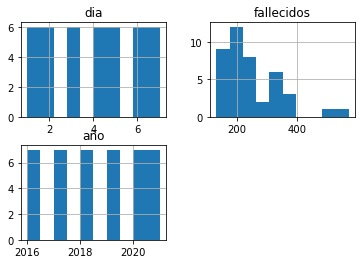

In [3]:
#Select of fallecmimientos by day
cursor = connection.cursor()

## executing the statement using 'execute()' method
cursor.execute("SELECT * FROM fallecimientos_dia")

data = cursor.fetchall()

fallecidos_dia = pd.DataFrame(data, columns=['dia','fallecidos','año'])

fallecidos_dia.dia = fallecidos_dia.dia.str.strip()

valores_dias = {"dia":  {'Lunes':1, 'Martes':2, 'MiÃ©rcoles':3, 'Jueves':4, 'Viernes':5,'SÃ¡bado':6,'Domingo':7}}
fallecidos_dia.replace(valores_dias, inplace=True)

fallecidos_dia.info()
fallecidos_dia.describe()
fallecidos_dia.hist()
fallecidos_dia.isna().sum()

fallecidos_dia['dia'].unique()

#df['column'] = df['column'].str.replace(old,new)

In [145]:
fallecidos_dia

,dia,fallecidos,año
0,1,334,2016
1,2,205,2016
2,3,191,2016
3,4,197,2016
4,5,230,2016
5,6,347,2016
6,7,489,2016
7,1,277,2017
8,2,159,2017
9,3,157,2017


## Gráfico de prueba

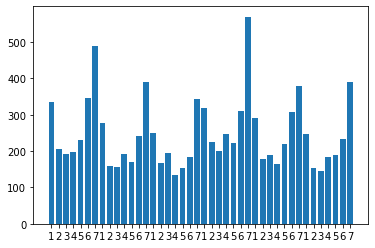

In [151]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = fallecidos_dia['fallecidos']
bars = (fallecidos_dia['dia'])
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

## Consulta fallecimientos por tipo de accidente

In [29]:
#Select of fallecimientos by type
cursor = connection.cursor()

## executing the statement using 'execute()' method
cursor.execute("SELECT * FROM fallecimientos_tipo")

data = cursor.fetchall()

fallecidos_tipo = pd.DataFrame(data, columns=['tipo','fallecidos','año'])

#valores_dias = {"dia":  {'Lunes':1, 'Martes':2, 'MiÃ©rcoles':3, 'Jueves':4, 'Viernes':5,'SÃ¡bado':6,'Domingo':7}}
#fallecidos_dia.replace(valores_dias, inplace=True)

#fallecidos_tipo.info()
#fallecidos_tipo.describe()
#fallecidos_tipo.hist()
#fallecidos_tipo.isna().sum()



In [8]:
fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('Ã','í')
fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('í³','ó')

fallecidos_tipo['tipo'].unique()

array(['Colisiones', 'Deslizamientos', 'Atropellos', 'Estrellamientos',
       'Caí\xaddas desde Vehí\xadculos en Movimiento',
       'Volcaduras de Vehí\xadculo', 'Colisiones con Animales',
       'Aplastamiento', 'Sin Especificación', 'Caidas', 'Volcaduras',
       'Aplastamientos', 'Atropellamientos', 'Colisión', 'Deslizamiento',
       'Atropellamiento', 'Estrellamiento', 'Caí\xadda', 'Volcadura',
       'Quemaduras', 'Caí\xadda y Atroppellamiento', 'Caí\xadda de Arbol'],
      dtype=object)

In [10]:
fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('as','a')
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
49,Aplatamiento,6,2021
25,Aplatamiento,0,2018
7,Aplatamiento,0,2016
16,Aplatamiento,0,2017
42,Aplatamientos,2,2020
34,Aplatamientos,4,2019
46,Atropellamiento,179,2021
38,Atropellamientos,214,2020
2,Atropellos,324,2016
20,Atropellos,241,2018


In [274]:
fallecidos_tipo['tipo'] = df['tipo'].str.replace('Colisión','Colisiones')
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
25,Aplastamiento,0,2018
49,Aplastamiento,6,2021
16,Aplastamiento,0,2017
7,Aplastamiento,0,2016
34,Aplastamientos,4,2019
42,Aplastamientos,2,2020
46,Atropellamiento,179,2021
38,Atropellamientos,214,2020
11,Atropellos,275,2017
2,Atropellos,324,2016


In [12]:
fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('os','o')
fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('as','a')
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
49,Aplatamiento,6,2021
25,Aplatamiento,0,2018
42,Aplatamiento,2,2020
7,Aplatamiento,0,2016
16,Aplatamiento,0,2017
34,Aplatamiento,4,2019
46,Atropellamiento,179,2021
38,Atropellamiento,214,2020
2,Atropello,324,2016
20,Atropello,241,2018


In [260]:
fallecidos_tipo['tipo'] = df['tipo'].str.replace('Caidas','Caída')
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
49,Aplastamiento,6,2021
25,Aplastamiento,0,2018
7,Aplastamiento,0,2016
16,Aplastamiento,0,2017
42,Aplastamientos,2,2020
34,Aplastamientos,4,2019
46,Atropellamiento,179,2021
38,Atropellamientos,214,2020
2,Atropellos,324,2016
20,Atropellos,241,2018


In [258]:
fallecidos_tipo['tipo'] = df['tipo'].str.replace('os','o')
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
49,Aplastamiento,6,2021
25,Aplastamiento,0,2018
42,Aplastamiento,2,2020
7,Aplastamiento,0,2016
34,Aplastamiento,4,2019
16,Aplastamiento,0,2017
46,Atropellamiento,179,2021
38,Atropellamiento,214,2020
2,Atropello,324,2016
20,Atropello,241,2018


In [270]:
fallecidos_tipo = fallecidos_tipo.drop(labels=53, axis=0)

KeyError: '[53] not found in axis'

In [13]:

fallecidos_tipo = fallecidos_tipo.drop(labels=52, axis=0)

In [15]:
fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('os','o')
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
49,Aplatamiento,6,2021
25,Aplatamiento,0,2018
42,Aplatamiento,2,2020
7,Aplatamiento,0,2016
16,Aplatamiento,0,2017
34,Aplatamiento,4,2019
46,Atropellamiento,179,2021
38,Atropellamiento,214,2020
20,Atropello,241,2018
2,Atropello,324,2016


In [17]:

fallecidos_tipo['tipo'] = fallecidos_tipo['tipo'].str.replace('Caída','Caida')

In [292]:
fallecidos_tipo.sort_values(by=['tipo'])

,tipo,fallecidos,año
25,Aplastamiento,0,2018
49,Aplastamiento,6,2021
16,Aplastamiento,0,2017
7,Aplastamiento,0,2016
34,Aplastamientos,4,2019
42,Aplastamientos,2,2020
46,Atropellamiento,179,2021
38,Atropellamientos,214,2020
11,Atropellos,275,2017
29,Atropellos,310,2019


In [289]:
fallecidos_tipo['tipo'].unique()

array(['Colisiones', 'Deslizamientos', 'Atropellos', 'Estrellamientos',
       'Caí\xadda desde Vehí\xadculos en Movimiento',
       'Volcadura de Vehí\xadculo', 'Colisiones con Animales',
       'Aplatamiento', 'Sin Especificación', 'Caida', 'Volcadura',
       'Aplatamientos', 'Atropellamientos', 'Colisión', 'Deslizamiento',
       'Atropellamiento', 'Estrellamiento', 'Caí\xadda', 'Quemadura'],
      dtype=object)

## Gráficos

### según el año en el rango de 2016 a 2018 ofrecerá un resultado

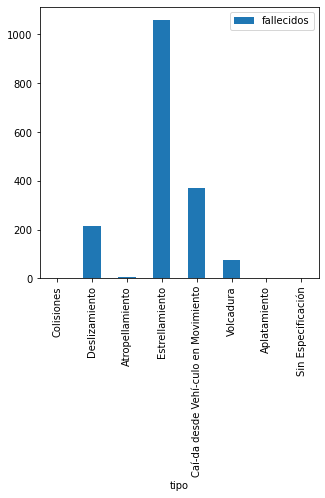

,tipo,fallecidos,año
36,Colisiones,1061,2020
37,Deslizamiento,370,2020
38,Atropellamiento,214,2020
39,Estrellamiento,74,2020
40,Caí­da desde Vehí­culo en Movimiento,7,2020
41,Volcadura,3,2020
42,Aplatamiento,2,2020
43,Sin Especificación,1,2020


In [20]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

#Data
fallecidos_year_tipo = fallecidos_tipo[fallecidos_tipo.año.eq(2020)] ##cambiar aqui

# Graphic
height = fallecidos_year_tipo['fallecidos']
bars = (fallecidos_year_tipo['tipo'])
y_pos = np.arange(len(bars))

my_colors = '#00ff00'

# Create bars
#plt.bar(y_pos, height)
fallecidos_year_tipo.groupby('tipo')['fallecidos'].sum().plot(kind='bar',legend='Reverse',figsize=(5,5))
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

fallecidos_year_tipo

## Consulta fallecimientos por intervalo de horas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   intervalo de horas  26 non-null     object
 1   fallecidos          26 non-null     int64 
 2   año                 26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 752.0+ bytes


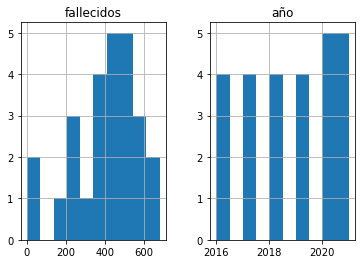

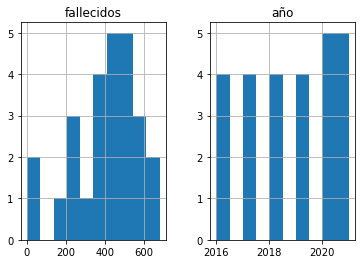

In [169]:
#Select of fallecimientos by hour
cursor = connection.cursor()

## executing the statement using 'execute()' method
cursor.execute("SELECT * FROM fallecimientos_hora")

data = cursor.fetchall()

fallecidos_hora = pd.DataFrame(data, columns=['intervalo de horas','fallecidos','año'])

fallecidos_hora.info()
fallecidos_hora.describe()
fallecidos_hora.hist()
fallecidos_hora.hist()
fallecidos_hora.isna().sum()

fallecidos_hora['intervalo de horas'] = fallecidos_hora['intervalo de horas'].str.replace('Ã‘','Ñ')

In [39]:
fallecidos_hora

NameError: name 'fallecidos_hora' is not defined

# SUMATORIAS ANUAL

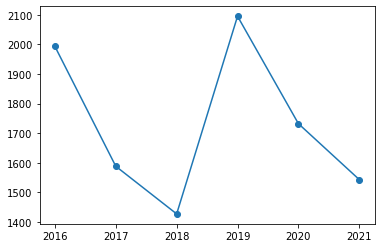

In [34]:
anual = fallecidos_tipo.groupby(by=['año']).sum()

plt.plot(anual.index,anual['fallecidos'],'-o')

In [50]:
anual

,fallecidos,MA
año,,
2016,1993,NaN
2017,1588,NaN
2018,1427,1790.5
2019,2095,1507.5
2020,1732,1761.0
2021,1543,1913.5


In [41]:
anual['MA'] = anual['fallecidos'].rolling(window=2).mean().shift(1)

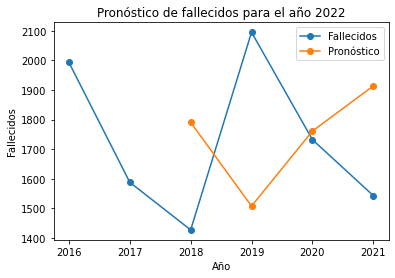

In [45]:
plt.plot(anual.index,anual['fallecidos'],'-o',label='Fallecidos')
plt.plot(anual.index,anual['MA'],'-o',label='Pronóstico')

plt.xlabel('Año')
plt.ylabel('Fallecidos')
plt.title('Pronóstico de fallecidos para el año 2022')
plt.legend(loc='best')
plt.show()

KeyError: 5